In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [10]:
train=pd.concat([pd.read_csv("../input/newtraincountfeat.csv",index_col=0),
                pd.read_csv("../input/training_variants",index_col=0)['Class']],axis=1)
train.shape,train.isnull().sum().sum()

((3321, 1968), 0)

In [13]:
test=pd.read_csv("../input/newtestcountfeat.csv",index_col=0)

In [22]:
a=(train.groupby("Class").sum()/train.sum()).T*100
a.max(axis=1).sort_values()

dash_line_represent                                            19.047619
nih_gov                                                        20.068807
site_pre                                                       21.266968
compare_control_shrna                                          21.428571
alternative_transcript                                         23.076923
score_individual                                               23.076923
mappable                                                       23.529412
pdgfrb_encode                                                  23.529412
buffer_mmol_tris_hcl                                           23.809524
detection_somatic_mutation                                     23.809524
cancer_survival                                                23.809524
delet                                                          24.442186
role_carcinogenesis                                            24.528302
variant_likely                                     

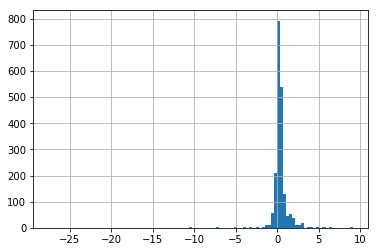

In [29]:
a=((train>0).mean()-(test>0).mean())*100
a.hist(bins=100)

In [30]:
a.abs().sort_values()

tumor_discovery                          0.000250
cause_treatment                          0.001870
harbor_ros1                              0.002369
fig_proliferation                        0.003241
current_world_health_organization        0.003304
smad4_point                              0.003304
variant_readily                          0.003304
vivo_tumour                              0.003990
splice_sf3b1_mutant                      0.003990
lead_consistent                          0.003990
percentage_wild                          0.004925
secretase_inhibitor_gsis                 0.005424
homophilic_cell                          0.005424
effect_specifically                      0.007044
human_gene_mutation_database_hgmd        0.007544
gene_sf3b1                               0.007544
increase_erk1_activation                 0.008479
analyze_spectrum                         0.008479
reintroduce_cell                         0.009164
genome_use_burrow_wheeler_aligner        0.009164


In [46]:
idf=np.log(1/(train>0).drop("Class",axis=1).mean())

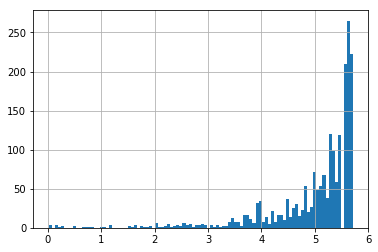

sequenc                                                  0.016700
includ                                                   0.025001
aci                                                      0.040559
amino                                                    0.132457
000                                                      0.145954
regulat                                                  0.154000
onco                                                     0.167793
delet                                                    0.232142
antibody                                                 0.286378
leng                                                     0.297669
progres                                                  0.511629
strongly                                                 0.528853
usc                                                      0.674355
lymph                                                    0.712914
roi                                                      0.770433
inhibitory

In [47]:
idf.hist(bins=100);plt.show()
idf.sort_values()

In [48]:
train_tfidf=train.drop("Class",axis=1)*idf

In [51]:
train_tfidf[train_tfidf==0]=np.nan

In [53]:
train_tfidf.to_csv("../input/newtraintfidf.csv")

In [54]:
train_tfidf.shape

(3321, 1967)

In [55]:
test_tfidf=test*idf

In [56]:
test_tfidf[test_tfidf==0]=np.nan

In [57]:
test_tfidf.to_csv("../input/newtesttfidf.csv")

In [58]:
test_tfidf.shape

(5668, 1967)

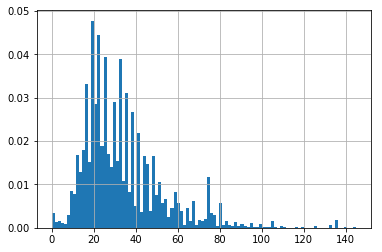

In [65]:
(train_tfidf>0).sum(1).hist(bins=100,normed=True)

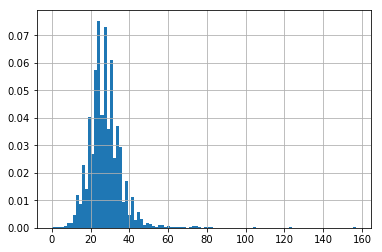

In [66]:
(test_tfidf>0).sum(1).hist(bins=100,normed=True)